In [15]:
import numpy as np
from matplotlib import pyplot as plt
import imageio
from numba import jit
from numpy.fft import fft, ifft, fftfreq


In [111]:
x = np.arange(-150, 150)
dt = 0.1
t = np.arange(dt, 1500*dt, dt)
m=0.3

def psi_0(x, x0, k0, sigma):
    return 1/ np.sqrt(sigma*np.sqrt(np.pi)) * np.exp(-1/2/sigma/sigma*(x-x0)**2)*np.exp(1j*x*k0)

def const(x):
    return np.zeros_like(x)

def square(x):
    return x*x/5000

def barrier(x):
    v = np.where(x>0, 0.8, 0)
    return np.where(x<30, v, 0)

def hat(x):
    return (x*x*(x*x-75**2))/3e7 + 0.265

def ev(V, x0, k0, sigma):
    psi = psi_0(x, x0, k0, sigma)
    print()
    res = np.array([psi])
    for _ in t:
        psi = np.exp(-1j*dt/2*V(x))*ifft(np.exp(-1j*(fftfreq(psi.size, dt))**2/2/m*dt)*fft(np.exp(-1j*dt/2*V(x))*psi))
        res = np.vstack((res, psi))
    return res


#dla odbicia od bariery k=50
#dla kwadratowego potencjału: x**2 / 100, k=50

#plt.plot(x, psi_0(x, -100, 5, 10)*np.conj(psi_0(x, -100, 5, 10)))

In [105]:
plot_ind = [i for i in range(len(t)) if i%10 ==0]
def plot_ev(V, res):
    for i in plot_ind:
        plt.plot(x,  np.abs(np.conj(res[i])*res[i]))
        plt.plot(x, V(x)/10)
        plt.xlabel("x")
        plt.ylabel(r"$|\Psi|^{2}$")
        plt.ylim(bottom=0, top=0.11)
        #print([-50+0.2*np.pi*i*dt/m], "rzeczywista: ", np.argmax(np.abs(np.conj(res[i])*res[i]))-150)
        plt.savefig(f'img{i:06d}.png', dpi=200)
        plt.clf()




done


KeyboardInterrupt: 

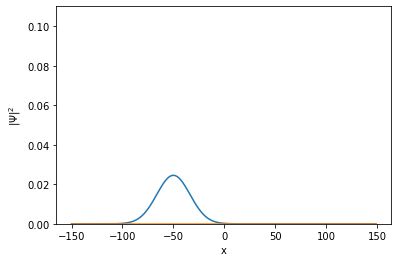

In [90]:
#k 12/7*np.pi
#siga 6, 10
#for k in [0, 12/7*np.pi] :
for k in [0.] :
    res = ev(const, -50, k, 15)
    print("done")
    plot_ev(const, res)

    filenames = [f'img{i:06d}.png' for i in plot_ind]
    with imageio.get_writer(f'pot_0_k{k}_wlasc.gif', mode='I') as writer:
        for filename in filenames:
            image = imageio.imread(filename)
            writer.append_data(image)

In [109]:
res = ev(hat, -53, 0.07*np.pi, 6)
print("done")

plot_ev(hat, res)

filenames = [f'img{i:06d}.png' for i in plot_ind]
with imageio.get_writer('pot_hat.gif', mode='I') as writer:
    for filename in filenames:
        image = imageio.imread(filename)
        writer.append_data(image)


done


<Figure size 432x288 with 0 Axes>

In [103]:
res = ev(barrier, -50, 0.06*np.pi, 10)
print("done")

plot_ev(barrier, res)

filenames = [f'img{i:06d}.png' for i in plot_ind]
with imageio.get_writer('pot_barrier22_.gif', mode='I') as writer:
    for filename in filenames:
        image = imageio.imread(filename)
        writer.append_data(image)


done


<Figure size 432x288 with 0 Axes>

In [112]:
res = ev(square, 0, 0.06*np.pi, 6)
print("done")

plot_ev(square, res)

filenames = [f'img{i:06d}.png' for i in plot_ind]
with imageio.get_writer('square.gif', mode='I') as writer:
    for filename in filenames:
        image = imageio.imread(filename)
        writer.append_data(image)


done


<Figure size 432x288 with 0 Axes>

In [92]:
def ev(V, x0, k0, sigma):
    psi = psi_0(x, x0, k0, sigma) + psi_0(x, -x0, -k0, sigma)
    print()
    res = np.array([psi])
    for _ in t:
        psi = np.exp(-1j*dt/2*V(x))*ifft(np.exp(-1j*(fftfreq(psi.size, dt))**2/2/m*dt)*fft(np.exp(-1j*dt/2*V(x))*psi))
        res = np.vstack((res, psi))
    return res

res = ev(const, -60, 0.15*np.pi, 15)
print("done")
plot_ev(const, res)

filenames = [f'img{i:06d}.png' for i in plot_ind]
with imageio.get_writer(f'pot_0_interference.gif', mode='I') as writer:
    for filename in filenames:
        image = imageio.imread(filename)
        writer.append_data(image)


done


<Figure size 432x288 with 0 Axes>